<a href="https://colab.research.google.com/github/bhushanzade02/ALGONIX-ML-LIBRARY/blob/main/ML_SCMS/sc-ml-2/Ann_vs_Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [2]:
# Transform: Convert to Tensor and Normalize (0-1)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:

# Download and load train/test sets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [4]:

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

In [5]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)


In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return self.softmax(x)


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    train_loss, train_acc = [], []

    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

    return train_loss, train_acc


def evaluate_model(model, testloader):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    return acc


In [9]:
ann = ANN().to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(ann.parameters(), lr=0.001)

print("Training ANN Model...")
ann_loss, ann_acc = train_model(ann, trainloader, criterion, optimizer, epochs=10)


Training ANN Model...
Epoch [1/10], Loss: 0.4405, Accuracy: 87.34%
Epoch [2/10], Loss: 0.2111, Accuracy: 93.64%
Epoch [3/10], Loss: 0.1533, Accuracy: 95.32%
Epoch [4/10], Loss: 0.1230, Accuracy: 96.26%
Epoch [5/10], Loss: 0.1016, Accuracy: 96.85%
Epoch [6/10], Loss: 0.0882, Accuracy: 97.26%
Epoch [7/10], Loss: 0.0756, Accuracy: 97.60%
Epoch [8/10], Loss: 0.0662, Accuracy: 97.89%
Epoch [9/10], Loss: 0.0590, Accuracy: 98.11%
Epoch [10/10], Loss: 0.0557, Accuracy: 98.19%


In [10]:
cnn = CNN().to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

print("\nTraining CNN Model...")
cnn_loss, cnn_acc = train_model(cnn, trainloader, criterion, optimizer, epochs=10)



Training CNN Model...
Epoch [1/10], Loss: 0.2291, Accuracy: 92.93%
Epoch [2/10], Loss: 0.0783, Accuracy: 97.70%
Epoch [3/10], Loss: 0.0577, Accuracy: 98.31%
Epoch [4/10], Loss: 0.0452, Accuracy: 98.60%
Epoch [5/10], Loss: 0.0390, Accuracy: 98.78%
Epoch [6/10], Loss: 0.0336, Accuracy: 98.91%
Epoch [7/10], Loss: 0.0286, Accuracy: 99.06%
Epoch [8/10], Loss: 0.0250, Accuracy: 99.17%
Epoch [9/10], Loss: 0.0218, Accuracy: 99.28%
Epoch [10/10], Loss: 0.0205, Accuracy: 99.34%


In [11]:
ann_test_acc = evaluate_model(ann, testloader)
cnn_test_acc = evaluate_model(cnn, testloader)

print("\nFinal Test Accuracy:")
print(f"ANN Accuracy: {ann_test_acc:.2f}%")
print(f"CNN Accuracy: {cnn_test_acc:.2f}%")



Final Test Accuracy:
ANN Accuracy: 97.44%
CNN Accuracy: 99.14%


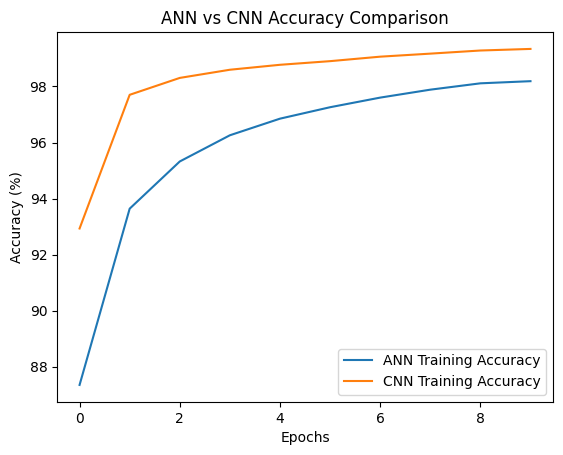

In [12]:
plt.plot(ann_acc, label='ANN Training Accuracy')
plt.plot(cnn_acc, label='CNN Training Accuracy')
plt.title('ANN vs CNN Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
